In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import os

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras import layers
from tensorflow.keras import regularizers

In [2]:
data_dir = os.path.join('C:/Users/kzhan/Desktop/archive/Preprocessed CT Scans')
train_dir = os.path.join('C:/Users/kzhan/Desktop/archive/Preprocessed CT Scans')
val_dir = os.path.join('C:/Users/kzhan/Desktop/archive/Preprocessed CT Scans')

In [3]:
IMG_HEIGHT = 150
IMG_WIDTH = 150
batch_size = 64
epochs = 15

In [4]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    subset = "training",
    validation_split = 0.2,
    seed = 123,
    image_size = (IMG_HEIGHT, IMG_WIDTH)
)

Found 19685 files belonging to 3 classes.
Using 15748 files for training.


In [5]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    subset = "validation",
    seed = 123, 
    validation_split = 0.3,
    image_size = (IMG_HEIGHT, IMG_WIDTH)
)

Found 19685 files belonging to 3 classes.
Using 5905 files for validation.


In [6]:
class_names = train_ds.class_names
print(class_names)
print(len(class_names))

['NiCT', 'nCT', 'pCT']
3


In [7]:
import matplotlib.pyplot as plt

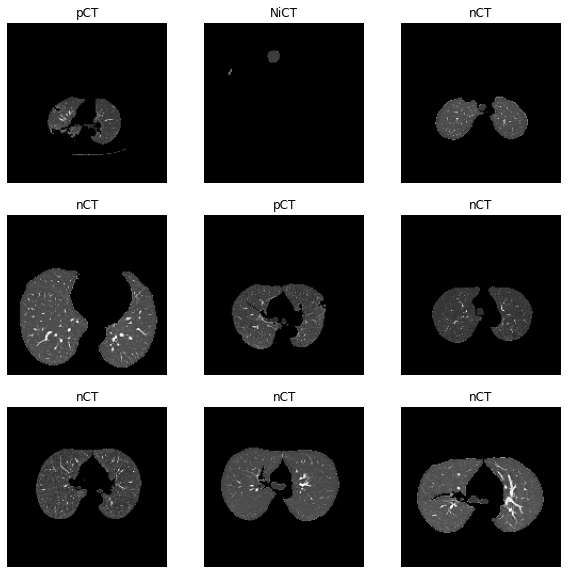

In [8]:
plt.figure(figsize = (10,10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [9]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [10]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))

In [11]:
image_batch, labels_batch = next(iter(normalized_ds))

In [12]:
num_classes = len(class_names)

In [15]:
model = keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape = (IMG_HEIGHT, IMG_WIDTH, 3)),
    layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, 4, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(512, activation = 'relu'),
    layers.Dense(num_classes)
])

In [17]:
model.compile(optimizer = 'adam', 
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
             metrics = ['accuracy'])

In [18]:
model.fit(train_ds, validation_data = val_ds, epochs = 5, batch_size = batch_size)

Epoch 1/5
493/493 [==============================] - 325s 660ms/step - loss: 0.2075 - accuracy: 0.9272 - val_loss: 0.0758 - val_accuracy: 0.9751
Epoch 2/5
493/493 [==============================] - 316s 642ms/step - loss: 0.0515 - accuracy: 0.9834 - val_loss: 0.0412 - val_accuracy: 0.9851
Epoch 3/5
493/493 [==============================] - 322s 654ms/step - loss: 0.0338 - accuracy: 0.9882 - val_loss: 0.0412 - val_accuracy: 0.9892
Epoch 4/5
493/493 [==============================] - 324s 656ms/step - loss: 0.0194 - accuracy: 0.9933 - val_loss: 0.0606 - val_accuracy: 0.9848
Epoch 5/5
493/493 [==============================] - 320s 649ms/step - loss: 0.0165 - accuracy: 0.9932 - val_loss: 0.0317 - val_accuracy: 0.9912


In [19]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape = (IMG_HEIGHT, IMG_WIDTH, 3)),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomZoom(0.2)
])

In [20]:
model.compile(loss = keras.losses.SparseCategoricalCrossentropy(),
             optimizer = keras.optimizers.Adam(),
             metrics = ['accuracy'])

result = model.evaluate(val_ds)
dict(zip(model.metrics_names, result))

185/185 [==============================] - 24s 128ms/step - loss: 0.1672 - accuracy: 0.9912


{'loss': 0.16724292933940887, 'accuracy': 0.9911938905715942}

In [72]:
model.save("lung_scan_classifier.h5")

In [73]:
model.save('saved_model/my_model')

INFO:tensorflow:Assets written to: saved_model/my_model\assets


In [1]:
new_model = tf.keras.models.load_model('saved_model/my_model')
new_model.summary()

NameError: name 'tf' is not defined

In [76]:
new_model.compile(optimizer = 'adam',
                 loss = keras.losses.SparseCategoricalCrossentropy(),
                 metrics = ['accuracy'])